# Vizualize Diff of contexts
* For all of the metrics one by one

In [1]:
import os
os.chdir('./data')

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob
from tabulate import tabulate
from IPython.display import Latex, display_html, display, HTML

## load daa

In [3]:
metric = 'SIM'

In [4]:

df = pd.read_csv(metric+'_mean_noface.csv', index_col=[0])
df_f03 = pd.read_csv(metric+'_mean_face_03.csv', index_col=[0])
df_f05 = pd.read_csv(metric+'_mean_face_05.csv', index_col=[0])
df_f07 = pd.read_csv(metric+'_mean_face_07.csv', index_col=[0])

### Calculate means

In [5]:
def calc_means(df):
    df = df.transpose()
    df['mean model'] = df.mean(axis=1)
    df = df.transpose()
    df['mean context'] = df.mean(axis=1)
    return df

In [6]:
df0 = df.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
df0

,all,person,no person,animal,sports,electronic
aim,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cas,0.410865,0.407912,0.502755,0.391060,0.438167,0.405628
covsal,0.437098,0.435892,0.474611,0.431493,0.432125,0.431504
gbvs,0.456899,0.453540,0.561441,0.439632,0.455956,0.451624
icf,0.463685,0.461694,0.525637,0.439458,0.475725,0.455837
ik,0.387092,0.384829,0.456805,0.369226,0.393532,0.387091
sun,0.349760,0.346092,0.463924,0.322741,0.331072,0.347655


In [7]:
df_f07

,all,person,no person,animal,sports,electronic
aim,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cas,0.495765,0.495309,0.509974,0.459758,0.516755,0.489959
covsal,0.566712,0.569782,0.471144,0.544083,0.563824,0.560291
gbvs,0.538773,0.538075,0.560496,0.508342,0.534467,0.533050
icf,0.548845,0.549731,0.521259,0.504549,0.563078,0.542500
ik,0.511631,0.513232,0.461823,0.475626,0.505847,0.508951
sun,0.466289,0.466288,0.466315,0.417233,0.434387,0.464503


In [8]:
df_diff_f03 = ((df_f03 - df0) / df0)*100
df_diff_f05 = ((df_f05 - df0) / df0)*100
df_diff_f07 = ((df_f07 - df0) / df0)*100

In [9]:
df_diff_f03

,all,person,no person,animal,sports,electronic
aim,NaN,NaN,NaN,NaN,NaN,NaN
cas,4.948497,5.097913,1.175550,3.962646,4.198513,4.874880
covsal,11.572942,11.878429,2.841047,9.175123,10.628421,11.354234
gbvs,4.456561,4.606142,0.695911,3.614800,4.048928,4.397863
icf,6.475204,6.670675,1.131729,5.300446,6.392125,6.542129
ik,9.920703,10.215697,2.364218,8.121386,7.834212,9.776468
sun,8.992324,9.299365,1.863561,7.352985,7.829757,9.071228


In [10]:
df_diff_f03 = calc_means(df_diff_f03)
df_diff_f05 = calc_means(df_diff_f05)
df_diff_f07 = calc_means(df_diff_f07)

In [11]:
df_diff_f07

,all,person,no person,animal,sports,electronic,mean context
aim,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cas,20.663907,21.425368,1.436020,17.567363,17.935448,20.790376,16.636414
covsal,29.653322,30.716311,-0.730584,26.093018,30.477105,29.846144,24.342553
gbvs,17.919503,18.638954,-0.168342,15.629086,17.219035,18.029407,14.544607
icf,18.365946,19.068267,-0.833003,14.811771,18.362210,19.011659,14.797808
ik,32.172845,33.366201,1.098503,28.817082,28.540308,31.481054,25.912666
sun,33.316728,34.729512,0.515234,29.277850,31.206412,33.610323,27.109343
mean model,25.348709,26.324102,0.219638,22.032695,23.956753,25.461494,20.557232


In [12]:
mean_context_diff_f03 = df_diff_f03.transpose().loc['mean context']
mean_context_diff_f05 = df_diff_f05.transpose().loc['mean context']
mean_context_diff_f07 = df_diff_f07.transpose().loc['mean context']

mean_context_diff = pd.DataFrame([mean_context_diff_f03, 
                            mean_context_diff_f05,
                            mean_context_diff_f07], index=[0.3,0.5,0.7])

mean_context_diff = mean_context_diff.transpose()
mean_context_diff

,0.3,0.5,0.7
aim,NaN,NaN,NaN
cas,4.043000,8.655138,16.636414
covsal,9.575033,17.888960,24.342553
gbvs,3.636701,7.744210,14.544607
icf,5.418718,10.009207,14.797808
ik,8.038781,16.283947,25.912666
sun,7.401537,15.308590,27.109343
mean model,6.352295,12.648342,20.557232


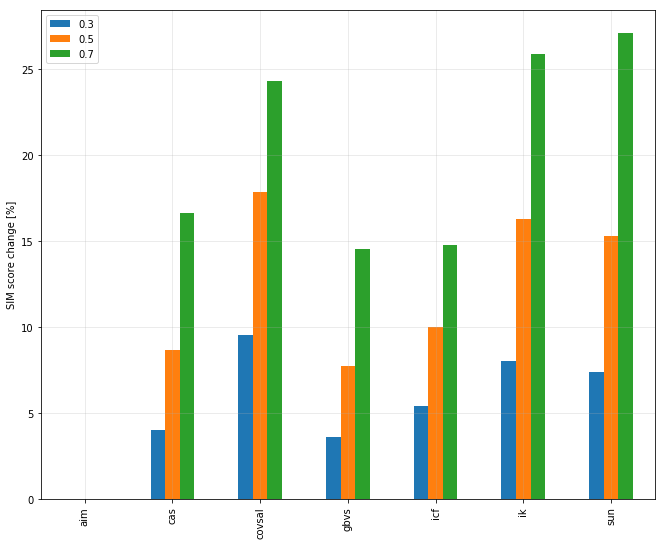

In [13]:
mean_context_diff = mean_context_diff.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

fig, ax = plt.subplots(figsize=(11,9));
mean_context_diff.plot.bar(ax=ax);
plt.grid(alpha=0.3)
# plt.title('Weight of face influence')
plt.ylabel(metric+' score change [%]');

plt.savefig('../plots/'+metric+'_improvment_mean_contexts.png', bbox_inches='tight', pad_inches=0)

In [14]:
mean_model_diff_f03 = df_diff_f03.loc['mean model']
mean_model_diff_f05 = df_diff_f05.loc['mean model']
mean_model_diff_f07 = df_diff_f07.loc['mean model']

mean_models_diff = pd.DataFrame([mean_model_diff_f03, 
                            mean_model_diff_f05,
                            mean_model_diff_f07], index=[0.3,0.5,0.7])

mean_models_diff = mean_models_diff.transpose()
mean_models_diff

,0.3,0.5,0.7
all,7.727705,15.466677,25.348709
person,7.961370,15.990192,26.324102
no person,1.678669,1.906834,0.219638
animal,6.254564,12.930704,22.032695
sports,6.821993,14.073815,23.956753
electronic,7.669467,15.521830,25.461494
mean context,6.352295,12.648342,20.557232


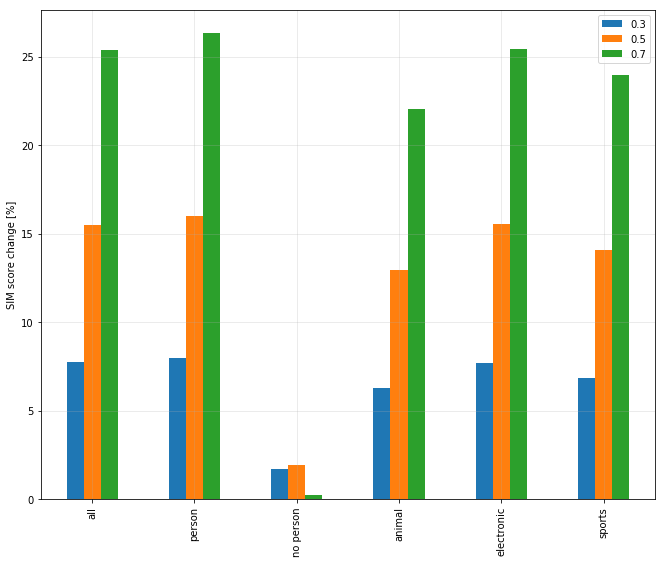

In [15]:
mean_models_diff = mean_models_diff.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]

fig, ax = plt.subplots(figsize=(11,9));
mean_models_diff.plot.bar(ax=ax);

plt.grid(alpha=0.3)

# plt.title('Weight of face influence')
plt.ylabel(metric+' score change [%]');

plt.savefig('../plots/'+metric+'_improvment_mean_model.jpg', bbox_inches='tight', pad_inches=0)